In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
target=df["Chance of Admit "]

In [6]:
for i in target :
    if i > 0.8 :
        df["Chance of Admit "] = df["Chance of Admit "].replace({i : "1"})
    else :
        df["Chance of Admit "] = df["Chance of Admit "].replace({i : "0"})

In [7]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


# Train_Test_Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y = df[['Chance of Admit ']]

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [11]:
xtrain.shape

(320, 7)

In [12]:
xtest.shape

(80, 7)

# Classification model 

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model=DecisionTreeClassifier().fit(xtrain,ytrain)

In [15]:
y_predict=model.predict(xtest)

# Evaluation of  Model 

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [17]:
print(confusion_matrix(ytest,y_predict))

[[58  2]
 [ 4 16]]


In [18]:
print(accuracy_score(ytest,y_predict))

0.925


In [19]:
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        60
           1       0.89      0.80      0.84        20

    accuracy                           0.93        80
   macro avg       0.91      0.88      0.90        80
weighted avg       0.92      0.93      0.92        80



In [25]:
y_predict

array(['1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0'], dtype=object)

# Ploting Tree 

In [20]:
from sklearn.tree import plot_tree

In [21]:
feature_name = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']

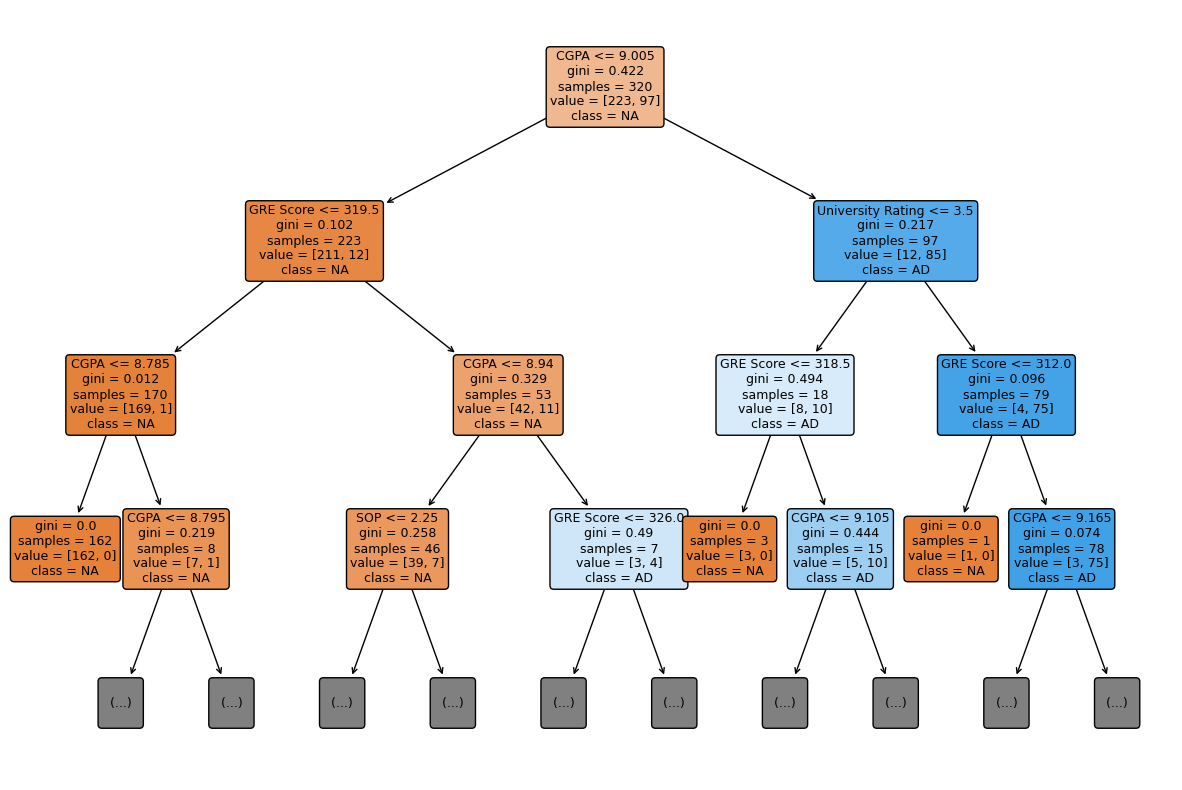

In [22]:
plt.figure(figsize=(15,10))
plot_tree(model , max_depth=3 , fontsize=9  , class_names=['NA','AD'] , feature_names=feature_name ,rounded=True ,filled=True)
plt.show()

In [23]:
mod1=DecisionTreeClassifier(criterion='entropy').fit(xtrain,ytrain)

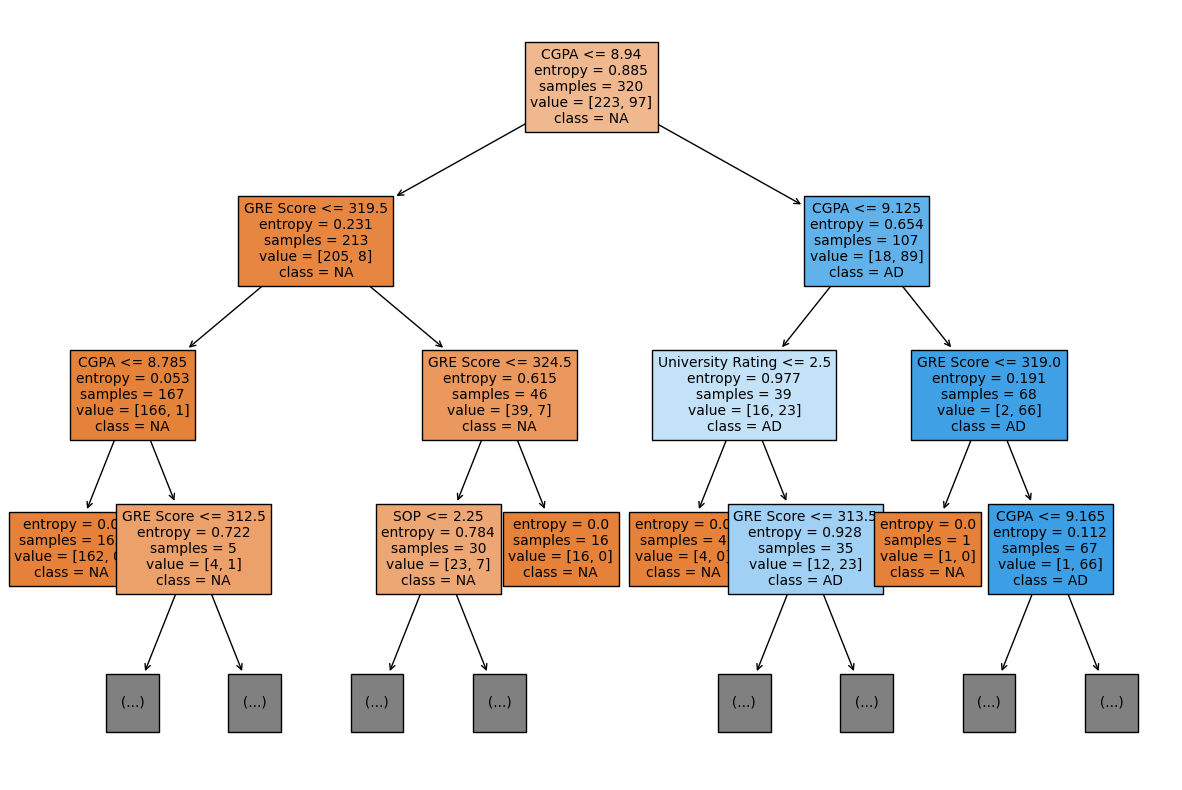

In [24]:
plt.figure(figsize=(15,10))
plot_tree(mod1,max_depth=3,fontsize=10,  class_names=['NA','AD'] ,feature_names=feature_name,filled=True)
plt.show()

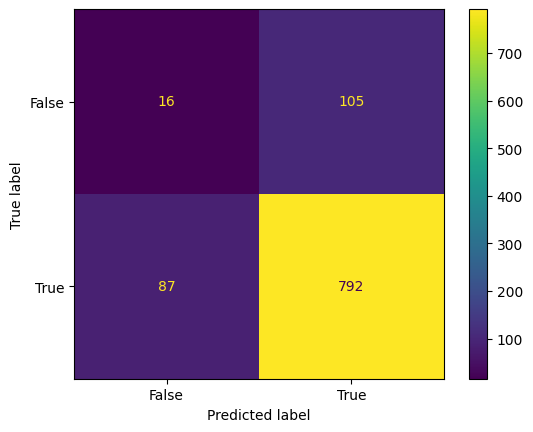

In [7]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Y_test = numpy.random.binomial(1,0.9,size = 1000)
Y_pred = numpy.random.binomial(1,0.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 